Random Sample Impuation: Takes random sample from dataset  and imputes that values, can be used MCAR

In [5]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

<IPython.core.display.Javascript object>

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [26]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [40]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [41]:
median = df.Age.median()

In [42]:
median

28.0

In [43]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,NaN
1,1,38.0,71.2833,NaN
2,1,26.0,7.9250,NaN
3,1,35.0,53.1000,NaN
4,0,35.0,8.0500,NaN


In [44]:
impute_nan(df,"Age", median)

In [45]:
df

,Survived,Age,Fare,Age_random,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,15.0,28.0
889,1,26.0,30.0000,26.0,26.0


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

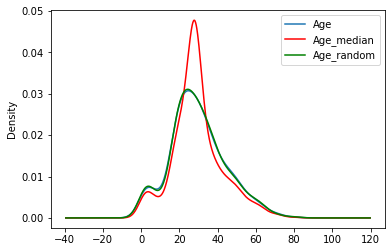

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Wont work in most of the cases

Capturing NAN with new value

In [52]:
df1 =pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

<IPython.core.display.Javascript object>

In [53]:
df1

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [56]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

<IPython.core.display.Javascript object>

In [57]:
df.Age.median()

28.0

In [58]:
df['Age'].fillna(df.Age.median(),inplace=True)

End of Distribution Imputation

In [60]:
df2=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])


<IPython.core.display.Javascript object>

In [61]:
df2

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


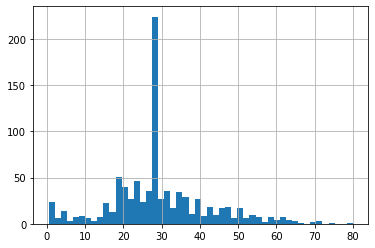

In [62]:
df.Age.hist(bins=50)

In [63]:
extreme=df.Age.mean()+3*df.Age.std()

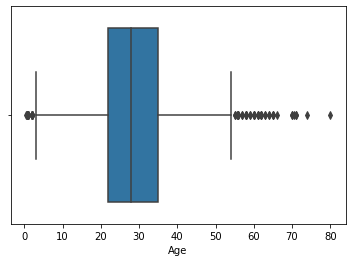

In [64]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [65]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [66]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [67]:

df.head()

,Survived,Age,Fare,Age_random,Age_median,Age_NAN,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0,0,22.0
1,1,38.0,71.2833,38.0,38.0,0,38.0
2,1,26.0,7.9250,26.0,26.0,0,26.0
3,1,35.0,53.1000,35.0,35.0,0,35.0
4,0,35.0,8.0500,35.0,35.0,0,35.0


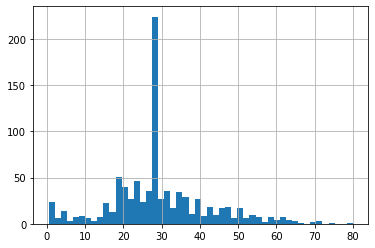

In [68]:
df['Age'].hist(bins=50)

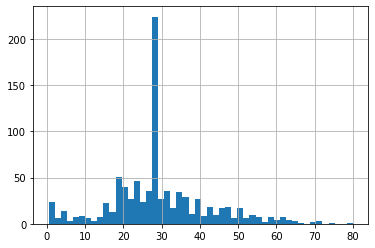

In [69]:
df['Age_end_distribution'].hist(bins=50)

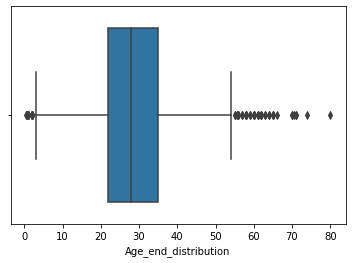

In [70]:
sns.boxplot('Age_end_distribution',data=df)